Dataset Overview:
   cityID    datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
0       1  01-12-2024     26.4     11.1  17.1          26.4          11.1   
1       1  02-12-2024     28.2     11.9  18.8          27.6          11.9   
2       1  03-12-2024     28.1     12.8  18.8          27.6          12.8   
3       1  04-12-2024     29.1     13.2  19.6          27.8          13.2   
4       1  05-12-2024     26.5     13.7  18.6          26.5          13.7   

   feelslike   dew  humidity  ...  sealevelpressure  cloudcover  visibility  \
0       17.1  12.0      75.4  ...            1013.2         0.0         2.7   
1       18.8  13.2      73.2  ...            1013.1         0.0         1.9   
2       18.8  13.5      74.7  ...            1014.6         0.1         1.6   
3       19.5  12.1      65.5  ...            1013.4         0.1         2.0   
4       18.6   9.9      61.1  ...            1013.7         0.0         2.3   

   solarradiation  solarenergy  uvindex  con

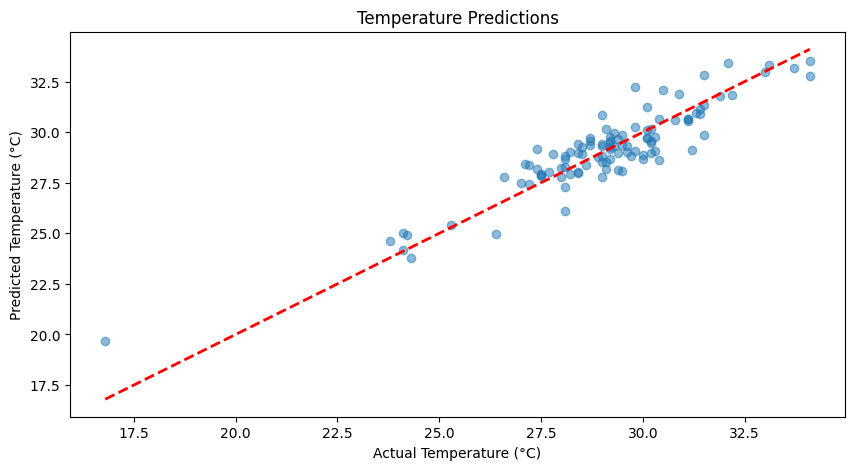

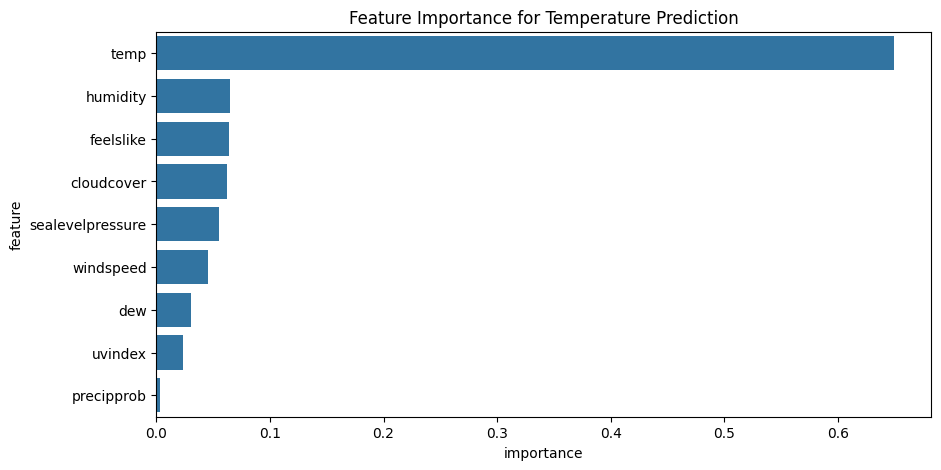


Sample Prediction:
Maximum Temperature: 28.48°C
Weather Condition: Partially cloudy

Possible weather conditions in the dataset:
['Clear' 'Partially cloudy' 'Rain, Partially cloudy' 'Overcast'
 'Rain, Overcast' 'Rain']


In [15]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('preprocessed wweather data.csv')

# Display first few rows and basic information
print("Dataset Overview:")
print(df.head())
print("\nDataset Info:")
print(df.info())

# Select features for prediction
features = ['temp', 'humidity', 'windspeed', 'cloudcover', 'sealevelpressure', 
           'feelslike', 'dew', 'precipprob', 'uvindex']

# Prepare target variables
X = df[features]
y_temp = df['tempmax']
y_condition = df['conditions']

# Encode weather conditions
le = LabelEncoder()
y_condition_encoded = le.fit_transform(y_condition)

# Split the data
X_train, X_test, y_temp_train, y_temp_test, y_cond_train, y_cond_test = train_test_split(
    X, y_temp, y_condition_encoded, test_size=0.2, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train temperature model
temp_model = RandomForestRegressor(n_estimators=100, random_state=42)
temp_model.fit(X_train_scaled, y_temp_train)

# Train condition model
condition_model = RandomForestClassifier(n_estimators=100, random_state=42)
condition_model.fit(X_train_scaled, y_cond_train)

# Make predictions
temp_pred = temp_model.predict(X_test_scaled)
condition_pred = condition_model.predict(X_test_scaled)

# Evaluate temperature predictions
temp_rmse = np.sqrt(mean_squared_error(y_temp_test, temp_pred))
print("\nTemperature Prediction Results:")
print(f"RMSE: {temp_rmse:.2f}°C")

# Evaluate condition predictions
condition_accuracy = accuracy_score(y_cond_test, condition_pred)
print("\nWeather Condition Prediction Results:")
print(f"Accuracy: {condition_accuracy:.2%}")

# Plot temperature predictions
plt.figure(figsize=(10, 5))
plt.scatter(y_temp_test, temp_pred, alpha=0.5)
plt.plot([y_temp_test.min(), y_temp_test.max()], 
         [y_temp_test.min(), y_temp_test.max()], 
         'r--', lw=2)
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.title('Temperature Predictions')
plt.show()

# Plot feature importance for temperature prediction
temp_importance = pd.DataFrame({
    'feature': features,
    'importance': temp_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=temp_importance, x='importance', y='feature')
plt.title('Feature Importance for Temperature Prediction')
plt.show()

# Function to make new predictions
def predict_weather(input_data):
    """
    Make predictions for new weather data
    
    Parameters:
    input_data: dict with weather parameters
    """
    # Convert input to DataFrame
    input_df = pd.DataFrame([input_data])
    
    # Scale input
    input_scaled = scaler.transform(input_df)
    
    # Make predictions
    temp = temp_model.predict(input_scaled)[0]
    condition_encoded = condition_model.predict(input_scaled)[0]
    condition = le.inverse_transform([condition_encoded])[0]
    
    return {
        'temperature': round(temp, 2),
        'condition': condition
    }

# Example prediction
sample_input = {
    'temp': 20,
    'humidity': 65,
    'windspeed': 10,
    'cloudcover': 30,
    'sealevelpressure': 1013,
    'feelslike': 22,
    'dew': 15,
    'precipprob': 20,
    'uvindex': 5
}

# Make prediction with sample data
prediction = predict_weather(sample_input)
print("\nSample Prediction:")
print(f"Maximum Temperature: {prediction['temperature']}°C")
print(f"Weather Condition: {prediction['condition']}")

# Display unique weather conditions
print("\nPossible weather conditions in the dataset:")
print(df['conditions'].unique())